<a href="https://colab.research.google.com/github/Yugsolanki/ML-SC-Lab/blob/main/Fuzzy_Sets_Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Fuzzy Set Implementation

In [2]:
class FuzzySet:
    def __init__(self, universe, membership_func):
        self.universe = universe
        self.membership = membership_func(universe)

    def plot(self, label):
        plt.plot(self.universe, self.membership, label=label)

    @staticmethod
    def union(set1, set2):
        return FuzzySet(set1.universe, lambda x: np.maximum(set1.membership, set2.membership))

    @staticmethod
    def intersection(set1, set2):
        return FuzzySet(set1.universe, lambda x: np.minimum(set1.membership, set2.membership))

    @staticmethod
    def complement(set):
        return FuzzySet(set.universe, lambda x: 1 - set.membership)

    @staticmethod
    def algebraic_sum(set1, set2):
        return FuzzySet(set1.universe, lambda x: set1.membership + set2.membership - set1.membership * set2.membership)

    @staticmethod
    def algebraic_product(set1, set2):
        return FuzzySet(set1.universe, lambda x: set1.membership * set2.membership)

# 2. Creating Fuzzy Sets

In [3]:
universe = np.linspace(0, 10, 1000)

# Triangular membership function
def triangular(x, a, b, c):
    return np.maximum(0, np.minimum((x-a)/(b-a), (c-x)/(c-b)))

# Gaussian membership function
def gaussian(x, mean, sigma):
    return np.exp(-((x - mean)**2) / (2 * sigma**2))

set_A = FuzzySet(universe, lambda x: triangular(x, 2, 4, 6))
set_B = FuzzySet(universe, lambda x: gaussian(x, 5, 1))

# 3. Applying Fuzzy Set Operations

In [4]:
union_set = FuzzySet.union(set_A, set_B)
intersection_set = FuzzySet.intersection(set_A, set_B)
complement_A = FuzzySet.complement(set_A)
alg_sum = FuzzySet.algebraic_sum(set_A, set_B)
alg_product = FuzzySet.algebraic_product(set_A, set_B)

# 4. Visualization

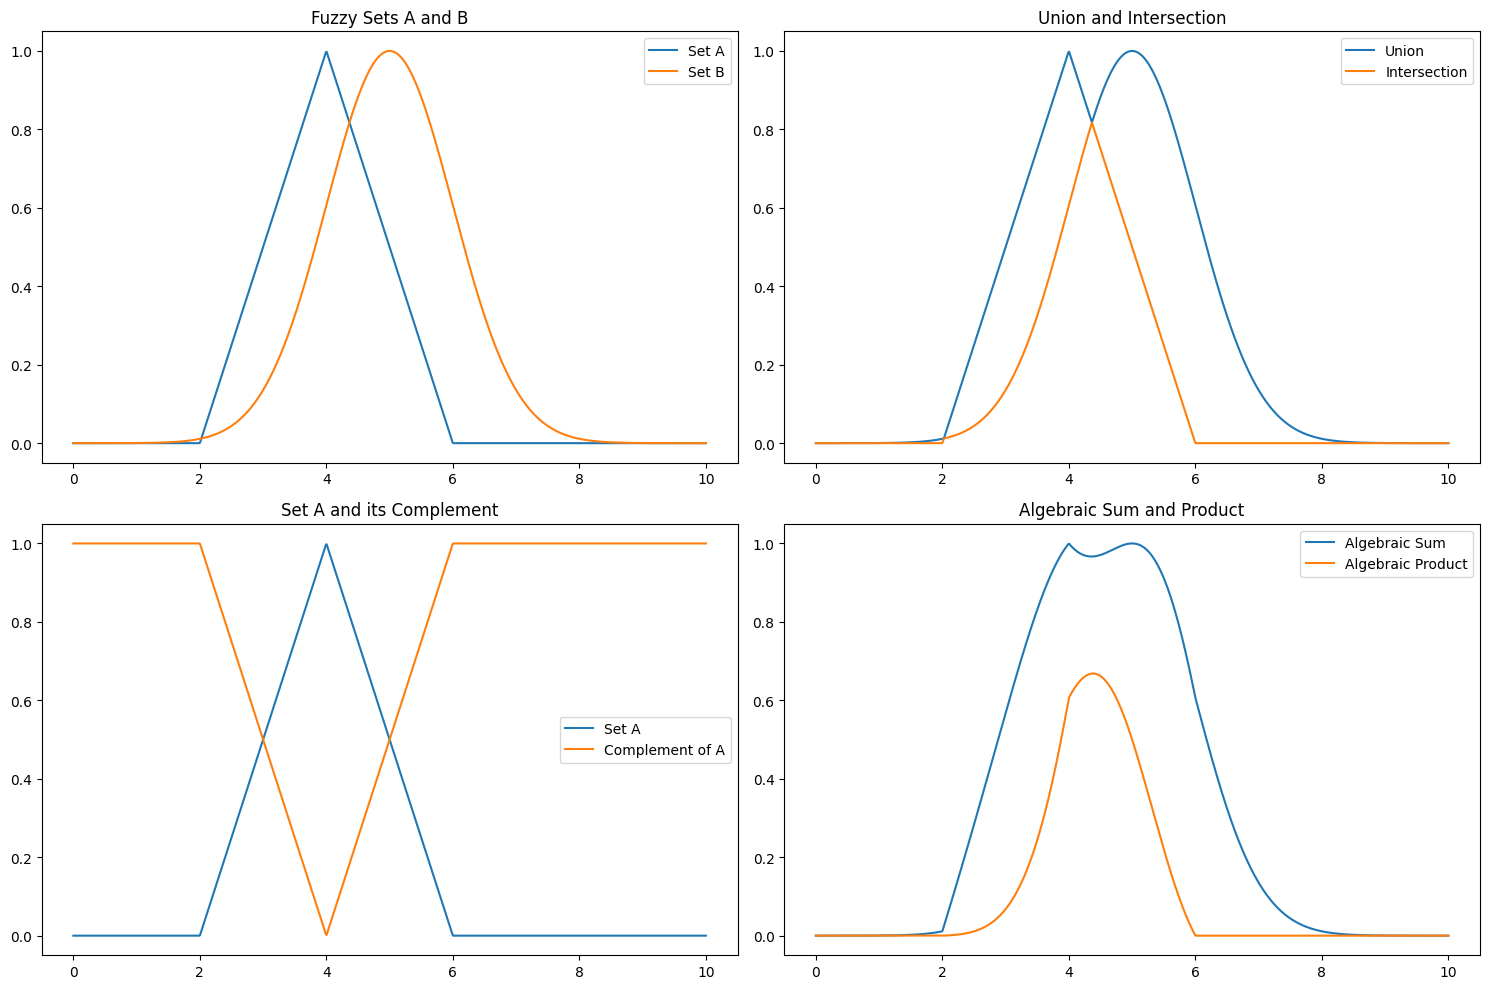

In [5]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
set_A.plot("Set A")
set_B.plot("Set B")
plt.title("Fuzzy Sets A and B")
plt.legend()

plt.subplot(2, 2, 2)
union_set.plot("Union")
intersection_set.plot("Intersection")
plt.title("Union and Intersection")
plt.legend()

plt.subplot(2, 2, 3)
set_A.plot("Set A")
complement_A.plot("Complement of A")
plt.title("Set A and its Complement")
plt.legend()

plt.subplot(2, 2, 4)
alg_sum.plot("Algebraic Sum")
alg_product.plot("Algebraic Product")
plt.title("Algebraic Sum and Product")
plt.legend()

plt.tight_layout()
plt.show()

# 5. Data Analysis

In [6]:
# Compute and print some characteristics of the fuzzy sets
def analyze_set(set, name):
    support = np.sum(set.membership > 0) / len(set.membership)
    core = np.sum(set.membership == 1) / len(set.membership)
    height = np.max(set.membership)
    print(f"{name}:")
    print(f"  Support: {support:.2f}")
    print(f"  Core: {core:.2f}")
    print(f"  Height: {height:.2f}")
    print(f"  Cardinality: {np.sum(set.membership):.2f}")
    print()

analyze_set(set_A, "Set A")
analyze_set(set_B, "Set B")
analyze_set(union_set, "Union")
analyze_set(intersection_set, "Intersection")

Set A:
  Support: 0.40
  Core: 0.00
  Height: 1.00
  Cardinality: 199.80

Set B:
  Support: 1.00
  Core: 0.00
  Height: 1.00
  Cardinality: 250.41

Union:
  Support: 1.00
  Core: 0.00
  Height: 1.00
  Cardinality: 318.01

Intersection:
  Support: 0.40
  Core: 0.00
  Height: 0.82
  Cardinality: 132.20



# 6. Alpha-cuts

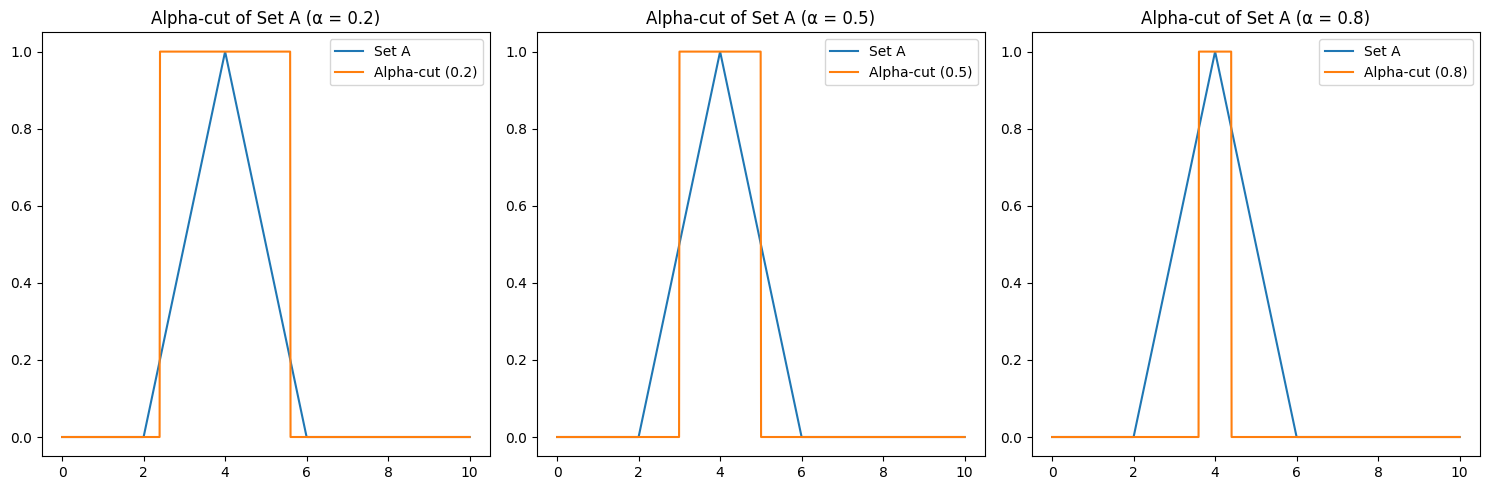

In [7]:
def alpha_cut(set, alpha):
    return FuzzySet(set.universe, lambda x: (set.membership >= alpha).astype(float))

alphas = [0.2, 0.5, 0.8]
plt.figure(figsize=(15, 5))

for i, alpha in enumerate(alphas):
    plt.subplot(1, 3, i+1)
    set_A.plot("Set A")
    alpha_cut(set_A, alpha).plot(f"Alpha-cut ({alpha})")
    plt.title(f"Alpha-cut of Set A (α = {alpha})")
    plt.legend()

plt.tight_layout()
plt.show()